#**IMPORTS**

In [74]:
# Connecting spreadsheet to Colab notebook

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
import pandas as pd
import os


In [75]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

#**SETTING DATA FRAME**

In [76]:
# Open spreadsheet and transfer data

import pandas as pd
import os

#url = "https://docs.google.com/spreadsheets/d/1r9qTAWrgrN6YX2PFJ7pkOLpAIXfLeVVKOgrxfOQtdlg/edit?usp=sharing"
#df = pd.read_csv(url)

#check if the spreadsheet opened right
try:
  sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1r9qTAWrgrN6YX2PFJ7pkOLpAIXfLeVVKOgrxfOQtdlg/edit?usp=sharing")
  print("Spreadsheet opened properly", sh.title)
except Exception as e:
  print("Spreadsheet did not open correctly: {e}", sh.title)

#check if we can get data from our spreadsheet
try:
  rows = sh.get_all_values()
  print(rows)
except AttributeError as e:
  print("Data not accessed: {e}")


Spreadsheet opened properly Copy of AI Challenge Dataset
Data not accessed: {e}


In [77]:
worksheet = sh.worksheet('AI Challenge Dataset')
rows = worksheet.get_all_values()

df = pd.DataFrame.from_records(rows)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks


#**DATA CLEANING**

In [78]:
cols = list(df.columns)
print(cols)

df = df.rename(columns={0: 'brand_id', 1: 'review_id', 2: 'review_dating_by_category', 3: 'ai_aspect', 4: 'ai_sentiment', 5: 'avg_rating', 6: 'is_product_recommended', 7: 'review_content', 8: 'is_anonymous', 9: 'like_count', 10: 'display_name'})
new_cols = list(df.columns)
print(new_cols)

df = df.drop(axis=0, index=0)

df.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['brand_id', 'review_id', 'review_dating_by_category', 'ai_aspect', 'ai_sentiment', 'avg_rating', 'is_product_recommended', 'review_content', 'is_anonymous', 'like_count', 'display_name']


,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [79]:
### REVIEW DATING BY CATEGORY ###
modify_col = df['review_dating_by_category']

In [80]:
### REVIEW CONTENT ###
review_content_col = df['review_content']

y = df['is_product_recommended']
X = df['review_content']

print(X.shape)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=1234)
X_train.head()

(2032,)
1    Basically, stick to the peanut butter ones. Th...
2    We do carry it, but we're currently out of sto...
3    We do carry Whims chocolate, but we haven’t or...
4    Very good. All the flavors are selling fast. I...
5    We still carry Whims, and it's selling well. A...
Name: review_content, dtype: object


,review_content
1842,Phreshly’s a very good product. We have not be...
1816,I've got a few customers that come in and they...
67,Little Saints is sold out for us right now. Ev...
93,"I only have a couple of kombucha brands, and I..."
1299,We actually have sold out at the moment. We pl...


In [81]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)

# Print the first 50 items in the vocabulary
print("Vocabulary size {0}: ".format(len(tfidf_vectorizer.vocabulary_)))
print(str(list(tfidf_vectorizer.vocabulary_.items())[0:50])+'\n')

# Transform training and test data using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.todense())

Vocabulary size 4032: 
[('phreshly', 2605), ('very', 3846), ('good', 1548), ('product', 2747), ('we', 3906), ('have', 1635), ('not', 2350), ('been', 369), ('selling', 3167), ('them', 3623), ('lately', 1958), ('it', 1851), ('kind', 1911), ('of', 2405), ('more', 2235), ('summertime', 3513), ('thing', 3631), ('here', 1665), ('re', 2843), ('golf', 1545), ('course', 875), ('so', 3312), ('seasonal', 3130), ('business', 522), ('just', 1882), ('don', 1079), ('think', 3633), ('lot', 2053), ('people', 2572), ('know', 1919), ('about', 70), ('the', 3620), ('in', 1758), ('market', 2113), ('enough', 1194), ('yet', 4012), ('aren', 239), ('familiar', 1298), ('with', 3969), ('brand', 466), ('ve', 3829), ('got', 1552), ('few', 1342), ('customers', 928), ('that', 3616), ('come', 736), ('and', 195), ('they', 3629), ('buying', 533), ('all', 158)]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

class_label_predictions = model.predict(X_test_tfidf)

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

first_five = list(tfidf_vectorizer.vocabulary_.items())[0:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

AUC on the test data: 0.5985
The size of the feature space: 4032
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('phreshly', 2605), ('very', 3846), ('good', 1548), ('product', 2747), ('we', 3906)]:


In [83]:
# Example of result

print('Review #1:\n')
print(X_test.to_numpy()[496])

print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[496]))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[496]))

Review #1:

We've always done well with Cult and we've been carrying them since we opened three years ago, and we are still doing well with it. We are still ordering it, so, we are doing well. I have never tasted them since I don't really eat packaged food but I think we are all good.

Prediction: Is this a good review? TRUE

Actual: Is this a good review? TRUE



Sophie- Currently working on splitting the review_dating_category, afterwards I plan on cleaning the data further by deleting any missing values, remove duplicates, and fill in missing ratings with median value.
Additionally I plan to incorporate our "clean data" into divya's tfidf and logistic regression object.

In [84]:
#Drop Missing Values
#1. drop rows with missing values
df = df.dropna()

#2. drop rows where all values are missing
df = df.dropna(how='all')

#3. drop columns with missing values
df = df.dropna(axis=1)

#4. drop columns where all values are missing
df = df.dropna(axis=1, how='all')

#5. print new data
df.head()
#df.head()

### FILL MISSING VALUES? ###

,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [85]:
# Check the first few rows of the 'review_dating_by_category' column to inspect the data
df['review_dating_by_category'].head(10)


,review_dating_by_category
1,"[{""id"":9946,""review_id"":2598,""rating_score"":5,..."
2,"[{""id"":15114,""review_id"":3718,""rating_score"":5..."
3,"[{""id"":15125,""review_id"":3719,""rating_score"":4..."
4,"[{""id"":7561,""review_id"":2004,""rating_score"":5,..."
5,"[{""id"":15113,""review_id"":3717,""rating_score"":4..."
6,"[{""id"":15105,""review_id"":3716,""rating_score"":4..."
7,"[{""id"":12076,""review_id"":3131,""rating_score"":5..."
8,"[{""id"":9971,""review_id"":2604,""rating_score"":5,..."
9,"[{""id"":9966,""review_id"":2603,""rating_score"":5,..."
10,"[{""id"":9956,""review_id"":2601,""rating_score"":5,..."


In [86]:
#import pandas as pd
#import json

# Assume df is your original DataFrame


# Step 1: Explode the list of dictionaries into separate rows
#df_exploded = df.explode('review_dating_by_category').reset_index(drop=True)

# Step 2: Check the data type and content in the column after exploding
#print(df_exploded['review_dating_by_category'].head(10))  # Print the first 10 rows
#print(type(df_exploded['review_dating_by_category'].iloc[0]))  # Check the type of the first row

# Step 3: If the data is in string format, convert it to dictionaries using json.loads
#if isinstance(df_exploded['review_dating_by_category'].iloc[0], str):
#    df_exploded['review_dating_by_category'] = df_exploded['review_dating_by_category'].apply(json.loads)

# Step 4: Filter out any rows where 'review_dating_by_category' is not a dictionary
#df_filtered = df_exploded[df_exploded['review_dating_by_category'].apply(lambda x: isinstance(x, dict))]

# Step 5: Normalize the filtered data (only valid dictionaries)
#df_normalized = pd.json_normalize(df_filtered['review_dating_by_category'])

# Display the normalized DataFrame
#print(df_normalized)
#df_normalized



import pandas as pd
import json

# Assume df is your original DataFrame
df_sub = df[['review_dating_by_category']]

# Step 1: Convert the string JSON objects in 'review_dating_by_category' to dictionaries
df_sub['review_dating_by_category'] = df_sub['review_dating_by_category'].apply(json.loads)

# Step 2: Explode the list of dictionaries into separate rows
df_exploded = df_sub.explode('review_dating_by_category').reset_index(drop=True)

# Step 3: Normalize the exploded data to create columns for 'id', 'review_id', 'rating_score', and 'rating_category'
df_normalized = pd.json_normalize(df_exploded['review_dating_by_category'])

# Step 4: Create a new DataFrame with the specified column names
df_final = df_normalized[['id', 'review_id', 'rating_score', 'rating_category']]

# Display the final DataFrame
df_final.head()


<ipython-input-86-6ccd06992a66>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['review_dating_by_category'] = df_sub['review_dating_by_category'].apply(json.loads)


,id,review_id,rating_score,rating_category
0,9946,2598,5.0,rating_shipping
1,9945,2598,5.0,rating_service
2,9947,2598,5.0,rating_price
3,9944,2598,5.0,rating_quality
4,15114,3718,5.0,rating_packaging


Suggestion #2 - Sophie

*   drops 'id' category and ties all 'id' values to associated 'review_id'
*   all NaN values are replaced with a 0
* this df will be smaller than the original df, but will retain all necesary information



In [87]:
# Pivot the DataFrame by 'review_id' so that each unique review_id has all rating_categories as columns
df_pivot_by_review_id = df_final.pivot_table(index='review_id', columns='rating_category', values='rating_score', aggfunc='first').reset_index()

# Replace NaN with 0
df_pivot_by_review_id.fillna(0, inplace=True)

# Display the modified DataFrame with NaN values replaced by 0
df_pivot_by_review_id.head()


rating_category,review_id,rating_packaging,rating_price,rating_quality,rating_service,rating_shipping,rating_taste
0,1547,5.0,5.0,5.0,5.0,5.0,5.0
1,1548,4.0,3.0,3.0,4.0,4.0,3.0
2,1549,4.0,4.0,4.0,4.0,4.0,4.0
3,1550,4.0,4.0,4.0,4.0,4.0,4.0
4,1551,4.0,4.0,4.0,4.0,4.0,4.0


**Exploratory Data Analysis (EDA) by Sophie**


*  Visualize patterns, trends, and anamolies in the data
*   analyze distrubition of key sentiments
* I will have two parts of EDA
1. Suggestion 1 EDA
2. Suggestion 2 EDA




Suggestion 2: by Sophie
* drops 'id' category and ties all 'id' values to associated 'review_id'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         2032 non-null   int64  
 1   rating_packaging  2032 non-null   float64
 2   rating_price      2032 non-null   float64
 3   rating_quality    2032 non-null   float64
 4   rating_service    2032 non-null   float64
 5   rating_shipping   2032 non-null   float64
 6   rating_taste      2032 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 111.2 KB
None
rating_category
review_id           0
rating_packaging    0
rating_price        0
rating_quality      0
rating_service      0
rating_shipping     0
rating_taste        0
dtype: int64
0


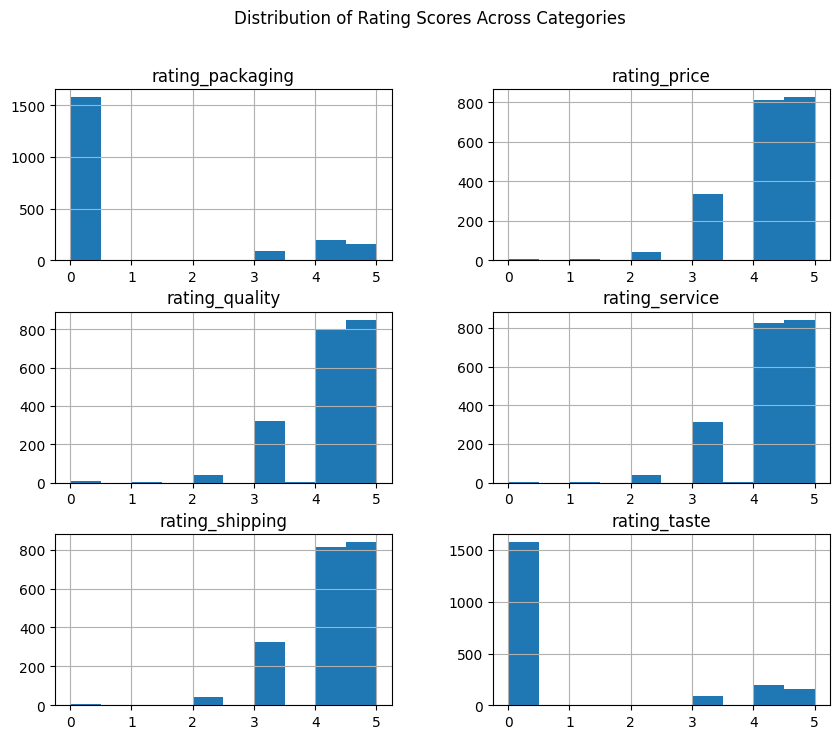

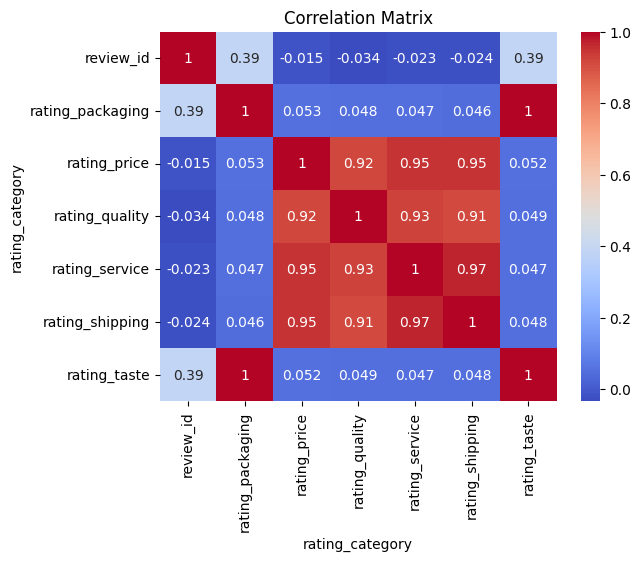

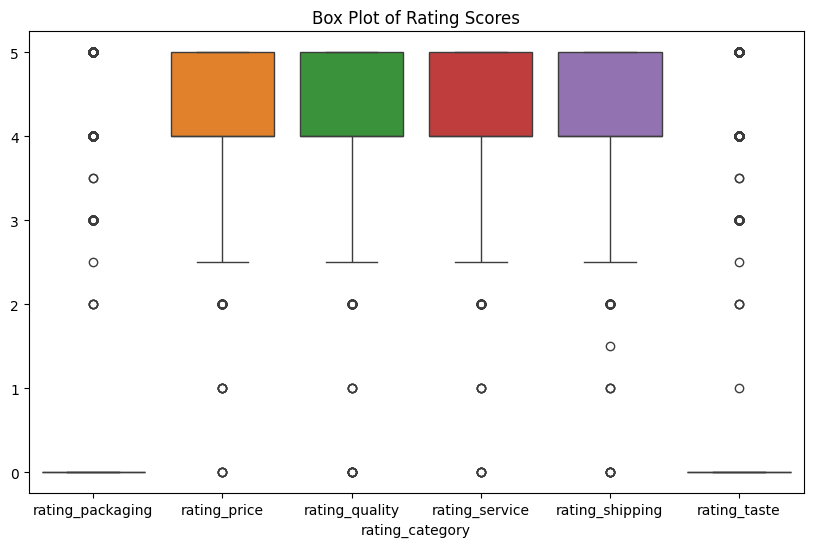

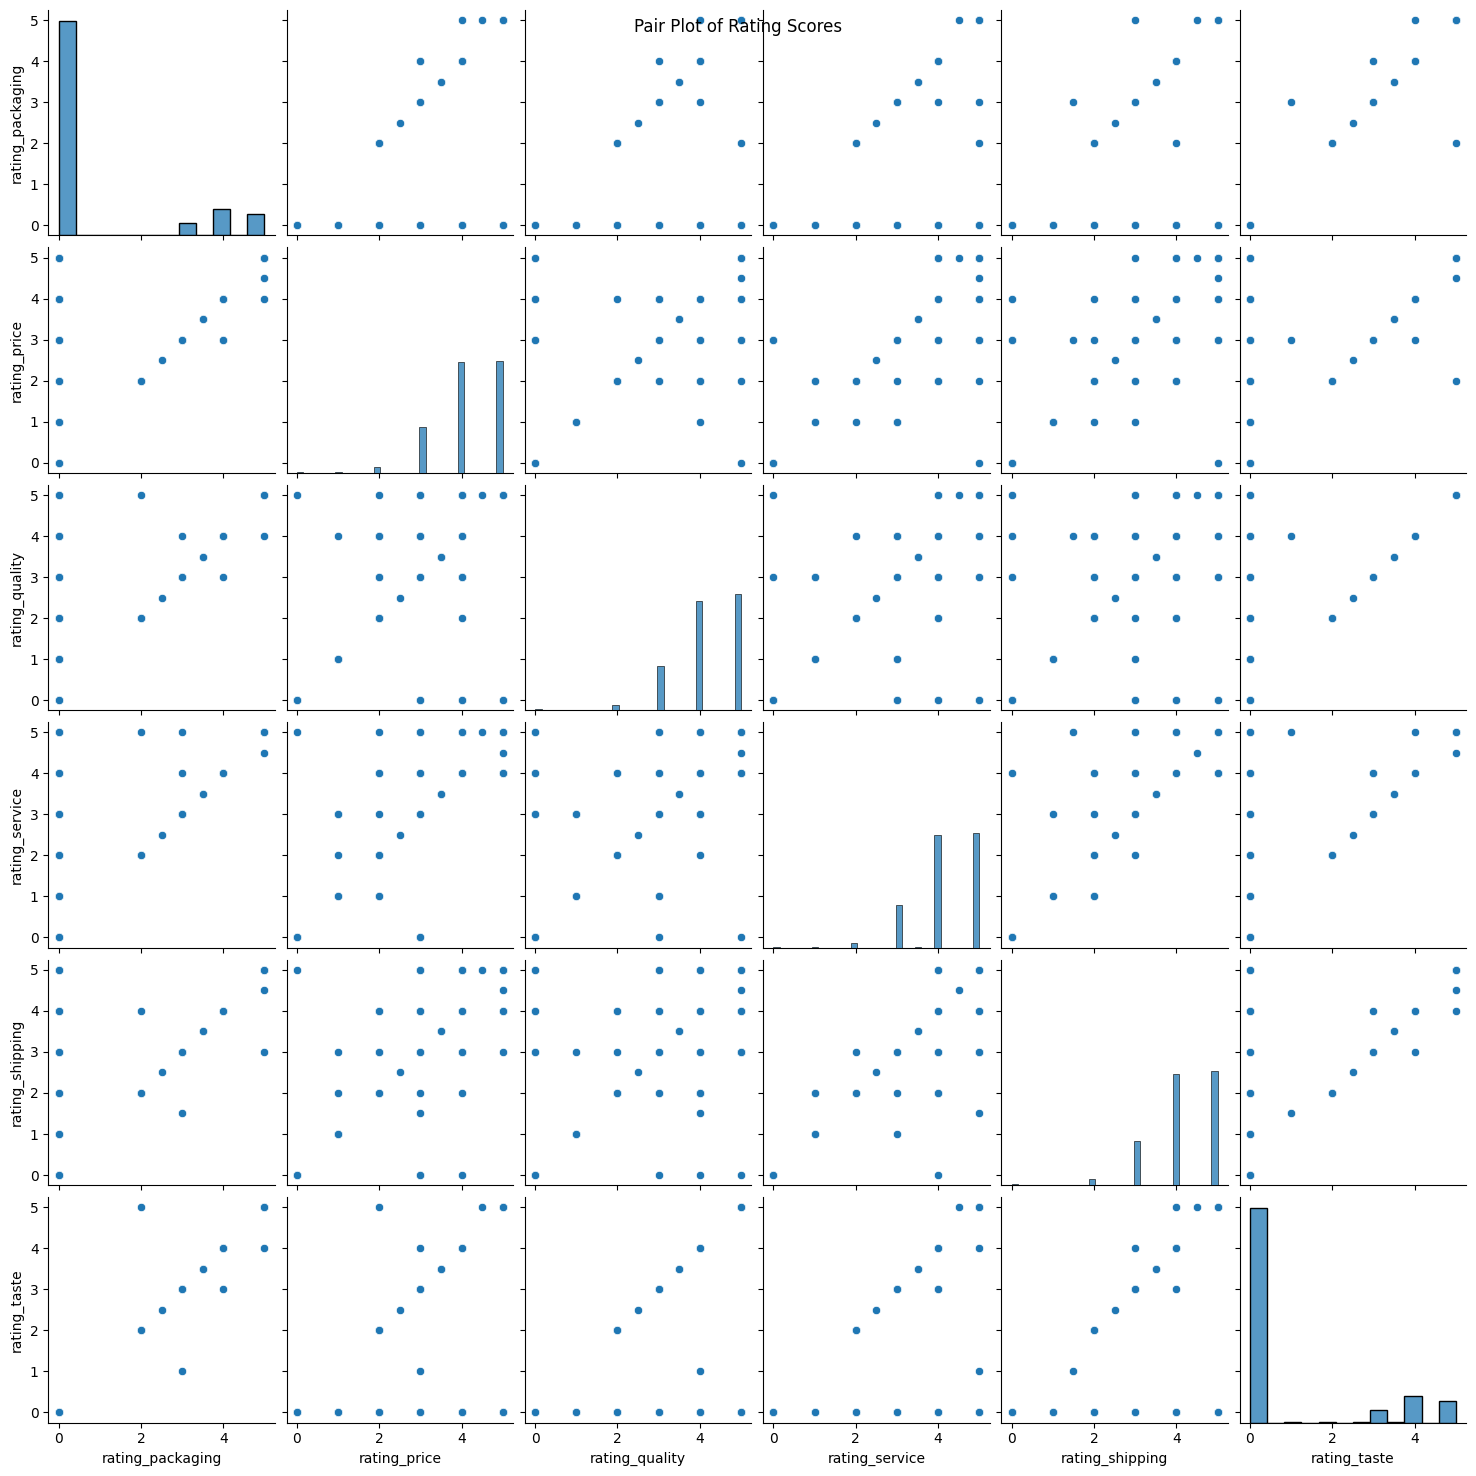

rating_category  rating_packaging  rating_price  rating_quality  \
review_id                                                         
1547                          5.0           5.0             5.0   
1548                          4.0           3.0             3.0   
1549                          4.0           4.0             4.0   
1550                          4.0           4.0             4.0   
1551                          4.0           4.0             4.0   
...                           ...           ...             ...   
3744                          4.0           4.0             4.0   
3745                          3.0           3.0             3.0   
3746                          4.0           4.0             4.0   
3747                          3.5           3.5             3.5   
3748                          5.0           5.0             5.0   

rating_category  rating_service  rating_shipping  rating_taste  
review_id                                                      

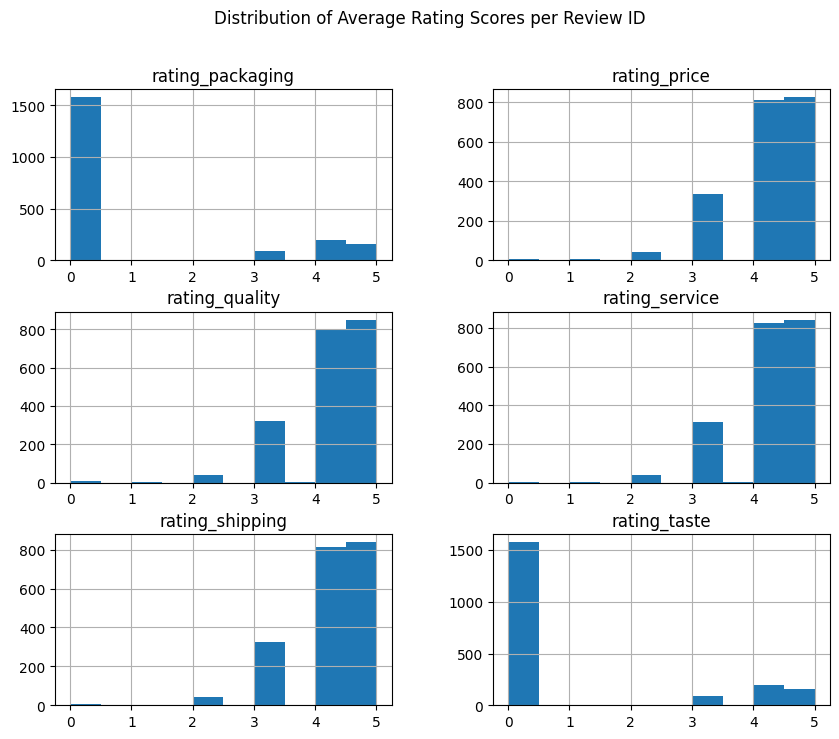

rating_category
rating_packaging    3.100393
rating_price        0.690234
rating_quality      0.715189
rating_service      0.668665
rating_shipping     0.690287
rating_taste        3.099828
dtype: float64


In [88]:
#Exploratory Data Analysis (EDA) by Sophie - Suggestion 2

import seaborn as sns
import matplotlib.pyplot as plt

#check for data types
print(df_pivot_by_review_id.info())

#summary of stats
df_pivot_by_review_id.describe()

#check for missing values
print(df_pivot_by_review_id.isnull().sum())

#check for duplicates
print(df_pivot_by_review_id.duplicated().sum())

#plot histograms for each rating category
df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']].hist(figsize=(10, 8), bins=10)
plt.suptitle('Distribution of Rating Scores Across Categories')
plt.show()

#let's perform correlation analysis
corr_matrix_two = df_pivot_by_review_id.corr()
sns.heatmap(corr_matrix_two, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#let's show some outliers by using a plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']])
plt.title('Box Plot of Rating Scores')
plt.show()

#pairplot to show relationship
sns.pairplot(df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']])
plt.suptitle('Pair Plot of Rating Scores')
plt.show()

#group by review id to see average rating
avg_rating_by_review_two = df_pivot_by_review_id.groupby('review_id').mean()
print(avg_rating_by_review_two)
#plot the distribution of average ratings
avg_rating_by_review_two.hist(figsize=(10, 8), bins=10)
plt.suptitle('Distribution of Average Rating Scores per Review ID')
plt.show()

#understand variance across the categories
variance_by_category_two = df_pivot_by_review_id[['rating_packaging', 'rating_price', 'rating_quality', 'rating_service', 'rating_shipping', 'rating_taste']].var()
print(variance_by_category_two)

In [89]:
# RUN THIS CELL ONCE (TO SAVE TO YOUR DRIVE INDIVIDUALLY)

#saving cleaned data to pickle file
from google.colab import drive
drive.mount('/content/drive')

df.to_pickle('/content/drive/My Drive/df_pivot_by_review_id.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
cleaned_data = pd.read_pickle('/content/drive/MyDrive/df_pivot_by_review_id.pkl')
cleaned_data.head()

,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [91]:
import pickle

import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Example: Save EDA results (dictionary)
eda_results = {
    'data_info': "Your data info here...",
    'missing_values': df_pivot_by_review_id.isnull().sum(),
    'duplicate_count': df_pivot_by_review_id.duplicated().sum(),
    'correlation_matrix': df_pivot_by_review_id.corr(),
    'variance_by_category': df_pivot_by_review_id.var(),
}

# Save the dictionary as a pickle file in Google Drive
with open('/content/drive/MyDrive/eda_results_with_plots.pkl', 'wb') as file:
    pickle.dump(eda_results, file)

print("EDA results saved to Google Drive.")


Mounted at /content/drive
EDA results saved to Google Drive.


In [92]:
# RUN THIS CELL ONCE (TO SAVE TO YOUR DRIVE INDIVIDUALLY)

#saving cleaned data to pickle file
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

#df.to_pickle('/content/drive/My Drive/eda_results_with_plots.pkl')
# Load the pickle file from Google Drive
with open('/content/drive/MyDrive/eda_results_with_plots.pkl', 'rb') as file:
    loaded_eda_results = pickle.load(file)

# Inspect the loaded data
print(loaded_eda_results.keys())  # Shows the keys of the dictionary
print(loaded_eda_results['missing_values'])  # Example: Access missing values


dict_keys(['data_info', 'missing_values', 'duplicate_count', 'correlation_matrix', 'variance_by_category'])
rating_category
review_id           0
rating_packaging    0
rating_price        0
rating_quality      0
rating_service      0
rating_shipping     0
rating_taste        0
dtype: int64


In [93]:
#cleaned_eda = pd.read_pickle('/content/drive/MyDrive/eda_results_with_plots.pkl')
#cleaned_eda.head()

#**GLOVE MODEL**

In [ ]:
#Download the GlOve Model
!wget http://nlp.stanford.edu/data/glove.6B.zip
#unzip the glove model
!unzip /content/glove.6B.zip

--2024-12-06 16:19:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-06 16:19:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-06 16:19:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!pip install gdown
!gdown --id https://colab.research.google.com/drive/1saWd4OvidkpzgWAW3TEEeZWHAhMxORqf?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=https://colab.research.google.com/drive/1saWd4OvidkpzgWAW3TEEeZWHAhMxORqf?usp=sharing

but Gdown can't. Please check connections and permissions.


In [113]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import string

# Path to a GloVe embedding file
glove_file = 'glove.6B.100d.txt'

# Load GloVe embeddings
embeddings_dict = {}
with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = vector

print(embeddings_dict['peanut'])

# Function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Convert sentences to GloVe vectors
def sentence_to_glove(sentence, embeddings_dict, embedding_dim=100):
    words = sentence.split()
    word_vectors = [embeddings_dict.get(word, np.zeros(embedding_dim)) for word in words]
    if len(word_vectors) == 0:  # Handle case where no words match GloVe
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)

# Process reviews into embeddings
def process_reviews_to_embeddings(group, embeddings_dict):
    return group['review_content'].apply(
        lambda x: sentence_to_glove(remove_punctuation(str(x).lower()), embeddings_dict)
    )

# Ensure avg_rating is numeric
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce').fillna(0)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1234)

# Aggregate reviews by brand_id to calculate brand embeddings (training set only)
brand_embeddings = {}
for brand_id, group in train_df.groupby('brand_id'):
    brand_reviews = process_reviews_to_embeddings(group, embeddings_dict)
    if not brand_reviews.empty:
        brand_embeddings[brand_id] = np.mean(list(brand_reviews), axis=0)

# Check for NaNs in brand_embeddings
for brand_id, embedding in brand_embeddings.items():
    if not np.isfinite(embedding).all():
        print(f"Non-finite embedding for brand_id {brand_id}: {embedding}")

# Create a list of brand_ids and compute similarity matrix
brand_ids_list = list(brand_embeddings.keys())
brand_vectors = np.array([brand_embeddings[brand_id] for brand_id in brand_ids_list])
similarity_matrix = cosine_similarity(brand_vectors)

# Recommend similar brands
def recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=5):
    if brand_id not in brand_ids_list:
        return []  # Return empty if brand_id is not found

    brand_index = brand_ids_list.index(brand_id)
    similarity_scores = similarity_matrix[brand_index]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # Exclude the brand itself
    similar_brands = [brand_ids_list[i] for i in similar_indices]

    # Fallback to popular brands if no valid recommendations
    if not similar_brands:
        similar_brands = recommend_popular_brands(brand_id, popularity_dict, top_n)
    return similar_brands

# Recommend the most popular brands
def recommend_popular_brands(brand_id, popularity_dict, top_n=5):
    return [brand for brand, _ in sorted(popularity_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]]

# Define evaluation metrics
def precision_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / k

def recall_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / len(actual_set) if len(actual_set) > 0 else 0

# Popularity-based fallback
popularity_dict = train_df['brand_id'].value_counts().to_dict()

# Evaluate the recommendation system
k = 5  # Top-K recommendations
precision_scores = []
recall_scores = []

for brand_id in test_df['brand_id'].unique():
    # Clean ground truth
    actual_brands = list(set(test_df[test_df['brand_id'] == brand_id]['brand_id']))

    # Predicted recommendations
    predicted_brands = recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=k)

    # Use fallback if predictions are empty
    if not predicted_brands:
        predicted_brands = recommend_popular_brands(brand_id, popularity_dict, top_n=k)

    # Evaluate if ground truth and predictions are valid
    if actual_brands and predicted_brands:
        precision_scores.append(precision_at_k(actual_brands, predicted_brands, k))
        recall_scores.append(recall_at_k(actual_brands, predicted_brands, k))

# Print results
if precision_scores and recall_scores:
    print(f"Average Precision@{k}: {np.mean(precision_scores):.4f}")
    print(f"Average Recall@{k}: {np.mean(recall_scores):.4f}")
else:
    print("No valid recommendations to evaluate.")

# Example: Recommend similar brands for a specific brand_id
example_brand_id = brand_ids_list[0]  # Use the first brand_id
similar_brands = recommend_similar_brands(example_brand_id, similarity_matrix, brand_ids_list)
print(f"Brands similar to {example_brand_id}: {similar_brands}")


[ 0.23416    1.2446    -0.30397   -0.21687   -0.35154   -0.28613
  1.111     -0.0059534  0.21068   -0.45087   -0.44641   -0.29668
  0.41101    0.43075   -0.35709    0.99468    0.37011   -0.49517
 -0.076085  -0.53673   -0.14276    1.3067     1.161     -0.22439
 -0.1428     1.7853     0.38548   -0.38248   -0.41316    0.081426
  0.43355    1.0572    -0.028541   0.2396    -0.54061    0.90535
  0.27804    0.82224    0.081122  -0.9334     0.081821  -0.93894
 -0.13111   -0.95066    0.30792    0.44303   -0.11094   -0.076481
 -0.26415   -0.60523   -0.36793   -0.30783   -0.48603    0.52884
 -0.87669   -0.026455   0.35917   -0.11415    0.52758   -0.22711
  0.17017    0.55048    0.43337   -0.042742   0.9013    -0.61872
  0.66976    0.33287    0.28849   -0.38248   -0.34899    0.19024
  0.39783    0.32563    0.19993    0.95857    0.46675   -0.49677
  0.092034   1.0799     0.0092128 -0.57665   -0.34241    0.59217
 -0.071897  -0.17477    0.15531   -0.19417   -0.0086584 -0.45854
  0.49659    0.66992   

In [111]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import string

# Path to a GloVe embedding file
glove_file = 'glove.6B.100d.txt'

# Load GloVe embeddings
embeddings_dict = {}
with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = vector

print(embeddings_dict['peanut'])

# Function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Convert sentences to GloVe vectors
def sentence_to_glove(sentence, embeddings_dict, embedding_dim=100):
    words = sentence.split()
    word_vectors = [embeddings_dict.get(word, np.zeros(embedding_dim)) for word in words]
    if len(word_vectors) == 0:  # Handle case where no words match GloVe
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)

# Process reviews into embeddings
def process_reviews_to_embeddings(group, embeddings_dict):
    return group['review_content'].apply(
        lambda x: sentence_to_glove(remove_punctuation(str(x).lower()), embeddings_dict)
    )

# Ensure avg_rating is numeric
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce').fillna(0)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1234)

# Aggregate reviews by brand_id to calculate brand embeddings (training set only)
brand_embeddings = {}
for brand_id, group in train_df.groupby('brand_id'):
    brand_reviews = process_reviews_to_embeddings(group, embeddings_dict)
    if not brand_reviews.empty:
        brand_embeddings[brand_id] = np.mean(list(brand_reviews), axis=0)

# Check for NaNs in brand_embeddings
for brand_id, embedding in brand_embeddings.items():
    if not np.isfinite(embedding).all():
        print(f"Non-finite embedding for brand_id {brand_id}: {embedding}")

# Create a list of brand_ids and compute similarity matrix
brand_ids_list = list(brand_embeddings.keys())
brand_vectors = np.array([brand_embeddings[brand_id] for brand_id in brand_ids_list])
similarity_matrix = cosine_similarity(brand_vectors)

# Recommend similar brands
def recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=5):
    if brand_id not in brand_ids_list:
        return []  # Return empty if brand_id is not found

    brand_index = brand_ids_list.index(brand_id)
    similarity_scores = similarity_matrix[brand_index]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # Exclude the brand itself
    similar_brands = [brand_ids_list[i] for i in similar_indices]
    return similar_brands

# Recommend the most popular brands
def recommend_popular_brands(brand_id, popularity_dict, top_n=5):
    return [brand for brand, _ in sorted(popularity_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]]

# Define evaluation metrics
def precision_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / k

def recall_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / len(actual_set) if len(actual_set) > 0 else 0

# Popularity-based fallback
popularity_dict = train_df['brand_id'].value_counts().to_dict()

# Evaluate the recommendation system
k = 5  # Top-K recommendations
precision_scores = []
recall_scores = []

for brand_id in test_df['brand_id'].unique():
    # Ground truth: actual brands in the test set
    actual_brands = test_df[test_df['brand_id'] == brand_id]['brand_id'].tolist()
    print(f"Brand ID: {brand_id}, Ground truth: {actual_brands}")

    # Predicted recommendations
    predicted_brands = recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=k)

    # Use fallback if predictions are empty
    if not predicted_brands:
        predicted_brands = recommend_popular_brands(brand_id, popularity_dict)

    # Evaluate only if there are actual and predicted brands
    if actual_brands:
        precision_scores.append(precision_at_k(actual_brands, predicted_brands, k))
        recall_scores.append(recall_at_k(actual_brands, predicted_brands, k))

# Print average metrics
if precision_scores and recall_scores:
    print(f"Average Precision@{k}: {np.mean(precision_scores):.4f}")
    print(f"Average Recall@{k}: {np.mean(recall_scores):.4f}")
else:
    print("No valid recommendations to evaluate.")

print(f"Brands in train_df: {len(train_df['brand_id'].unique())}")
print(f"Brands in test_df: {len(test_df['brand_id'].unique())}")
print(f"Overlap: {len(set(train_df['brand_id']).intersection(set(test_df['brand_id'])))}")

# Example: Recommend similar brands for a specific brand_id
example_brand_id = brand_ids_list[0]  # Use the first brand_id
similar_brands = recommend_similar_brands(example_brand_id, similarity_matrix, brand_ids_list)
print(f"Brands similar to {example_brand_id}: {similar_brands}")


[ 0.23416    1.2446    -0.30397   -0.21687   -0.35154   -0.28613
  1.111     -0.0059534  0.21068   -0.45087   -0.44641   -0.29668
  0.41101    0.43075   -0.35709    0.99468    0.37011   -0.49517
 -0.076085  -0.53673   -0.14276    1.3067     1.161     -0.22439
 -0.1428     1.7853     0.38548   -0.38248   -0.41316    0.081426
  0.43355    1.0572    -0.028541   0.2396    -0.54061    0.90535
  0.27804    0.82224    0.081122  -0.9334     0.081821  -0.93894
 -0.13111   -0.95066    0.30792    0.44303   -0.11094   -0.076481
 -0.26415   -0.60523   -0.36793   -0.30783   -0.48603    0.52884
 -0.87669   -0.026455   0.35917   -0.11415    0.52758   -0.22711
  0.17017    0.55048    0.43337   -0.042742   0.9013    -0.61872
  0.66976    0.33287    0.28849   -0.38248   -0.34899    0.19024
  0.39783    0.32563    0.19993    0.95857    0.46675   -0.49677
  0.092034   1.0799     0.0092128 -0.57665   -0.34241    0.59217
 -0.071897  -0.17477    0.15531   -0.19417   -0.0086584 -0.45854
  0.49659    0.66992   

In [109]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import string

# Path to a GloVe embedding file uploaded in cell before
glove_file = 'glove.6B.100d.txt'

# Load GloVe embeddings
embeddings_dict = {}
with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = vector

print(embeddings_dict['peanut'])

# Function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Convert sentences to GloVe vectors
def sentence_to_glove(sentence, embeddings_dict, embedding_dim=100):
    words = sentence.split()
    word_vectors = [embeddings_dict.get(word, np.zeros(embedding_dim)) for word in words]
    if len(word_vectors) == 0:  # Handle case where no words match GloVe
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)

# Process reviews into embeddings
def process_reviews_to_embeddings(group, embeddings_dict):
    return group['review_content'].apply(
        lambda x: sentence_to_glove(remove_punctuation(str(x).lower()), embeddings_dict)
    )

# Ensure avg_rating is numeric
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce').fillna(0)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1234)

# Aggregate reviews by brand_id to calculate brand embeddings
brand_embeddings = {}
for brand_id, group in df.groupby('brand_id'):
    brand_reviews = process_reviews_to_embeddings(group, embeddings_dict)
    brand_embeddings[brand_id] = np.mean(list(brand_reviews), axis=0)

# Check for NaNs in brand_embeddings
for brand_id, embedding in brand_embeddings.items():
    if not np.isfinite(embedding).all():
        print(f"Non-finite embedding for brand_id {brand_id}: {embedding}")

# Create a list of brand_ids and compute similarity matrix
brand_ids_list = list(brand_embeddings.keys())
brand_vectors = np.array([brand_embeddings[brand_id] for brand_id in brand_ids_list])
similarity_matrix = cosine_similarity(brand_vectors)

# Recommend similar brands
def recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=5):
    if brand_id not in brand_ids_list:
        return []  # Return empty if brand_id is not found

    brand_index = brand_ids_list.index(brand_id)
    similarity_scores = similarity_matrix[brand_index]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # Exclude the brand itself
    similar_brands = [brand_ids_list[i] for i in similar_indices]
    return similar_brands

# Example: Recommend similar brands for a specific brand_id
example_brand_id = brand_ids_list[0]  # Use the first brand_id
similar_brands = recommend_similar_brands(example_brand_id, similarity_matrix, brand_ids_list)
print(f"Brands similar to {example_brand_id}: {similar_brands}")


[ 0.23416    1.2446    -0.30397   -0.21687   -0.35154   -0.28613
  1.111     -0.0059534  0.21068   -0.45087   -0.44641   -0.29668
  0.41101    0.43075   -0.35709    0.99468    0.37011   -0.49517
 -0.076085  -0.53673   -0.14276    1.3067     1.161     -0.22439
 -0.1428     1.7853     0.38548   -0.38248   -0.41316    0.081426
  0.43355    1.0572    -0.028541   0.2396    -0.54061    0.90535
  0.27804    0.82224    0.081122  -0.9334     0.081821  -0.93894
 -0.13111   -0.95066    0.30792    0.44303   -0.11094   -0.076481
 -0.26415   -0.60523   -0.36793   -0.30783   -0.48603    0.52884
 -0.87669   -0.026455   0.35917   -0.11415    0.52758   -0.22711
  0.17017    0.55048    0.43337   -0.042742   0.9013    -0.61872
  0.66976    0.33287    0.28849   -0.38248   -0.34899    0.19024
  0.39783    0.32563    0.19993    0.95857    0.46675   -0.49677
  0.092034   1.0799     0.0092128 -0.57665   -0.34241    0.59217
 -0.071897  -0.17477    0.15531   -0.19417   -0.0086584 -0.45854
  0.49659    0.66992   

In [107]:
# Recommend similar brands
def recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=5):
    if brand_id not in brand_ids_list:
        return []  # Return empty if brand_id is not found

    brand_index = brand_ids_list.index(brand_id)
    similarity_scores = similarity_matrix[brand_index]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # Exclude the brand itself
    similar_brands = [brand_ids_list[i] for i in similar_indices]
    return similar_brands

# Define evaluation metrics
def precision_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / k

def recall_at_k(actual, predicted, k):
    actual_set = set(actual)
    predicted_set = set(predicted[:k])
    return len(actual_set & predicted_set) / len(actual_set)

# Evaluate the recommendation system
k = 5  # Top-K recommendations
precision_scores = []
recall_scores = []

for brand_id in test_df['brand_id'].unique():
    # Ground truth: actual brands in the test set
    actual_brands = test_df[test_df['brand_id'] == brand_id]['brand_id'].tolist()

    # Predicted recommendations
    predicted_brands = recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=k)

    # Use fallback if predictions are empty
    if not predicted_brands:
        predicted_brands = recommend_popular_brands(brand_id, popularity_dict)

    # Evaluate only if there are actual and predicted brands
    if actual_brands:
        precision_scores.append(precision_at_k(actual_brands, predicted_brands, k))
        recall_scores.append(recall_at_k(actual_brands, predicted_brands, k))

# Print average metrics
if precision_scores and recall_scores:
    print(f"Average Precision@{k}: {np.mean(precision_scores):.4f}")
    print(f"Average Recall@{k}: {np.mean(recall_scores):.4f}")
else:
    print("No valid recommendations to evaluate.")


Average Precision@5: 0.0000
Average Recall@5: 0.0000


In [94]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import string

# Path to a GloVe embedding file uploaded in cell before
glove_file = 'glove.6B.100d.txt'

# Load GloVe embeddings
embeddings_dict = {}
with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = vector


print(embeddings_dict['peanut'])

# remove puntuation from review and columns
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

reviews = df['review_content'].apply(lambda x: remove_punctuation(x.lower()))
rating = df['is_product_recommended']
brand_ids = df['brand_id']

# convert a sentences into its GloVe vector representation
def sentence_to_glove(sentence, embeddings_dict, embedding_dim=100):
    words = sentence.split()
    word_vectors = [embeddings_dict.get(word, np.zeros(embedding_dim)) for word in words]

    # Handle case if all words in a sentence are unknown to glove
    if len(word_vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)

# Convert each review into a GloVe vector
X_glove = np.array([sentence_to_glove(sentence, embeddings_dict) for sentence in reviews])

# no empty values
X_glove = np.nan_to_num(X_glove)

X_train, X_test, y_train, y_test = train_test_split(X_glove, rating, train_size=0.75, random_state=1234)

# train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


probability_predictions = model.predict_proba(X_test)[:, 1]
class_label_predictions = model.predict(X_test)

# area under curve
auc = roc_auc_score(y_test, probability_predictions)
print(f"AUC on the test data: {auc:.4f}")

[ 0.23416    1.2446    -0.30397   -0.21687   -0.35154   -0.28613
  1.111     -0.0059534  0.21068   -0.45087   -0.44641   -0.29668
  0.41101    0.43075   -0.35709    0.99468    0.37011   -0.49517
 -0.076085  -0.53673   -0.14276    1.3067     1.161     -0.22439
 -0.1428     1.7853     0.38548   -0.38248   -0.41316    0.081426
  0.43355    1.0572    -0.028541   0.2396    -0.54061    0.90535
  0.27804    0.82224    0.081122  -0.9334     0.081821  -0.93894
 -0.13111   -0.95066    0.30792    0.44303   -0.11094   -0.076481
 -0.26415   -0.60523   -0.36793   -0.30783   -0.48603    0.52884
 -0.87669   -0.026455   0.35917   -0.11415    0.52758   -0.22711
  0.17017    0.55048    0.43337   -0.042742   0.9013    -0.61872
  0.66976    0.33287    0.28849   -0.38248   -0.34899    0.19024
  0.39783    0.32563    0.19993    0.95857    0.46675   -0.49677
  0.092034   1.0799     0.0092128 -0.57665   -0.34241    0.59217
 -0.071897  -0.17477    0.15531   -0.19417   -0.0086584 -0.45854
  0.49659    0.66992   

In [108]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics.pairwise import cosine_similarity
import string

brand_embeddings = {}
for brand_id, group in df.groupby('brand_id'):
    brand_reviews = group['review_content'].apply(lambda x: sentence_to_glove(remove_punctuation(x.lower()), embeddings_dict))
    brand_embeddings[brand_id] = np.mean(list(brand_reviews), axis=0)

# Compute similarities between all brands
brand_ids_list = list(brand_embeddings.keys())
brand_vectors = np.array([brand_embeddings[brand_id] for brand_id in brand_ids_list])
similarity_matrix = cosine_similarity(brand_vectors)

def recommend_similar_brands(brand_id, similarity_matrix, brand_ids_list, top_n=5):
    if brand_id not in brand_ids_list:
        return []  # Return empty if brand_id is not found

    brand_index = brand_ids_list.index(brand_id)
    similarity_scores = similarity_matrix[brand_index]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]  # Exclude the brand itself
    similar_brands = [brand_ids_list[i] for i in similar_indices]
    return similar_brands

# Extract unique brand_ids
brand_ids = df['brand_id'].unique()

# Example: Recommend similar brands for a specific brand_id
example_brand_id = brand_ids[0]  # Pick the first brand_id
similar_brands = recommend_similar_brands(example_brand_id, similarity_matrix, brand_ids_list)
print(f"Brands similar to {example_brand_id}: {similar_brands}")

# Recommend top-rated brands based on average rating
top_rated_brands = df.groupby('brand_id')['avg_rating'].mean().sort_values(ascending=False).head(5).index.tolist()
print(f"Top-rated brands: {top_rated_brands}")

Brands similar to 00411460f7c92d2124a67ea0f4cb5f85: ['839ab46820b524afda05122893c2fe8e', 'ac627ab1ccbdb62ec96e702f07f6425b', '5a4b25aaed25c2ee1b74de72dc03c14e', '0d0fd7c6e093f7b804fa0150b875b868', '496e05e1aea0a9c4655800e8a7b9ea28']
Top-rated brands: ['e96ed478dab8595a7dbda4cbcbee168f', 'eecca5b6365d9607ee5a9d336962c534', 'b73ce398c39f506af761d2277d853a92', '6974ce5ac660610b44d9b9fed0ff9548', 'a0a080f42e6f13b3a2df133f073095dd']


In [ ]:
# # Parse review_dating_by_category JSON field
# def parse_review_categories(json_field, num_categories=6):
#     if not isinstance(json_field, str) or not json_field.startswith("["):
#         return [0] * num_categories  # Default zero-filled list
#     try:
#         categories = json.loads(json_field)
#         scores = [category.get("rating_score", 0) for category in categories]
#         # Pad or truncate scores to the required length
#         return scores[:num_categories] + [0] * (num_categories - len(scores))
#     except json.JSONDecodeError:
#         return [0] * num_categories



# # Load the dataset (assuming it’s a DataFrame)
# # Columns: brand_id, review_id, review_dating_by_category, avg_rating, is_product_recommended, review_content, is_anonymous, like_count
# df['review_content'] = df['review_content'].apply(remove_punctuation)
# df['review_dating_scores'] = df['review_dating_by_category'].apply(parse_review_categories)

In [ ]:
# # Map 'TRUE'/'FALSE' to 1/0
# df['is_product_recommended'] = df['is_product_recommended'].map({'TRUE': 1, 'FALSE': 0}).fillna(0)

# text_embeddings = np.array([sentence_to_glove(sentence, embeddings_dict) for sentence in df['review_content']])
# review_dating_scores = np.array(df['review_dating_scores'].tolist())
# avg_rating = df['avg_rating'].fillna(0).values.reshape(-1, 1)
# like_count = df['like_count'].fillna(0).values.reshape(-1, 1)
# # is_anonymous = df['is_anonymous'].astype(int).values.reshape(-1, 1)

In [ ]:
# # Combine features
# X = np.hstack([text_embeddings, review_dating_scores, avg_rating, like_count])
# y = df['is_product_recommended'].astype(int).values

# print(X)
# print(y)

[[-0.10079258891443411 0.3209989311350953 0.2849144942116081 ... 0.0 '5'
  '0']
 [-0.10605984799942728 0.29840086337368366 0.3238444448748635 ... 5.0 '5'
  '']
 [-0.15460708083230115 0.1270172850243629 0.33380046238501865 ... 4.0 '4'
  '']
 ...
 [-0.044218568336218594 0.18912974944803865 0.2969105558702722 ... 0.0
  '4' '0']
 [-0.11418283598536587 0.23805810416677406 0.37011499250294655 ... 0.0
  '5' '0']
 [-0.09526578635715022 0.19910039702928303 0.21674991108587768 ... 0.0
  '5' '0']]
[1 1 1 ... 1 1 1]


#**WORD2VEC**

In [ ]:
import gensim

reviews = df['review_content']
rating = df['is_product_recommended']

sample = reviews.iloc[0]
list(gensim.utils.simple_preprocess(sample))

['basically',
 'stick',
 'to',
 'the',
 'peanut',
 'butter',
 'ones',
 'the',
 'other',
 'flavors',
 'they',
 're',
 'terrible',
 'peanut',
 'butter',
 'ones',
 'bestsellers',
 'big',
 'bags',
 'small',
 'bag',
 'doesn',
 'matter',
 'the',
 'other',
 'ones',
 'sold',
 'but',
 'they',
 'took',
 'little',
 'while',
 'to',
 'sell',
 'out',
 'but',
 'the',
 'peanut',
 'butter',
 'cup',
 'sometimes',
 'would',
 'get',
 'two',
 'cases',
 'of',
 'each',
 'every',
 'week',
 'so',
 'they',
 'go',
 'up',
 'fast',
 'as',
 'seller',
 'would',
 'love',
 'to',
 'get',
 'more',
 'promo',
 'prices',
 'but',
 'from',
 'the',
 'customers',
 'no',
 'complaints',
 'sometimes',
 'the',
 'big',
 'bags',
 'maybe',
 'little',
 'bit',
 'too',
 'pricey',
 'because',
 'we',
 'sell',
 'it',
 'for',
 'maybe',
 'if',
 'the',
 'cost',
 'price',
 'could',
 'go',
 'down',
 'for',
 'little',
 'bit',
 'it',
 'would',
 'be',
 'more',
 'appealing']

In [ ]:
original_X = X
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))
X.head()

,review_content
1,"[basically, stick, to, the, peanut, butter, on..."
2,"[we, do, carry, it, but, we, re, currently, ou..."
3,"[we, do, carry, whims, chocolate, but, we, hav..."
4,"[very, good, all, the, flavors, are, selling, ..."
5,"[we, still, carry, whims, and, it, selling, we..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1234)
X_train.head()

,review_content
1379,"[honestly, don, really, sell, lot, of, it, so,..."
1927,"[we, re, not, carrying, them, at, the, moment,..."
652,"[sometimes, there, is, lag, in, order, confirm..."
1447,"[we, sell, bottle, of, each, week, roughly, bu..."
1417,"[packaging, is, really, cute, think, people, l..."


In [ ]:
print("Begin")
word2vec_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

print("End")

Begin
End


In [ ]:
print("Vocabulary Size:", len(word2vec_model.wv.key_to_index))

top25 = word2vec_model.wv.index_to_key[:25]
print("Top 25:", top25)

# TO FIND SIMILARITY BETWEEN TWO WORDS
# word2vec_model.wv.similarity(w1='WORD 1', w2='WORD 2')

Vocabulary Size: 2424
Top 25: ['it', 'the', 'we', 'and', 'to', 'of', 'that', 'but', 'is', 'in', 'they', 'have', 'for', 'so', 'well', 'people', 're', 'them', 'like', 'really', 'our', 'on', 'just', 'good', 'not']


In [ ]:
pd.DataFrame({w:word2vec_model.wv[w] for w in top25}).T.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
it,-0.250763,0.184842,0.087873,0.084756,0.015954,-0.862705,0.508862,1.163390,-0.276262,-0.459613,-0.082882,-0.766772,-0.276406,0.122970,0.183571,-0.124631,0.188865,-0.626983,-0.069794,-0.956013,0.264924,0.317799,0.386500,-0.096586,-0.155294,0.011812,-0.425252,-0.396315,-0.249799,-0.095804,0.540383,0.021702,0.375408,-0.461192,-0.250858,0.507038,0.318444,-0.423161,-0.195233,-0.604933,0.168496,-0.404472,-0.212797,-0.113913,0.432372,0.011763,-0.342231,-0.065215,0.345140,0.434511,0.069310,-0.415326,0.222905,-0.142177,0.057383,0.122912,0.396797,-0.131984,-0.341600,0.149234,-0.077032,-0.130323,0.151006,-0.157210,-0.571963,0.515871,0.122638,0.294784,-0.617161,0.712408,-0.219713,0.156030,0.475703,-0.044080,0.674648,-0.082746,0.157299,0.109073,-0.429498,0.019466,-0.336937,0.127822,-0.369615,0.670613,0.008212,-0.092685,0.323910,0.596034,0.436339,0.010144,0.551350,0.295987,-0.006742,-0.019029,1.004061,0.572198,0.271275,-0.510659,0.126945,-0.045823
the,-0.431126,0.161375,0.104891,0.204688,-0.037493,-0.992461,0.562380,1.236704,-0.224504,-0.499969,-0.063116,-0.703257,-0.290583,0.139466,0.234125,-0.192805,0.058058,-0.634329,-0.124307,-0.851173,0.272450,0.361879,0.454054,-0.087417,-0.172880,0.041594,-0.506695,-0.601007,-0.341701,-0.011498,0.782627,0.006672,0.382250,-0.416413,-0.254155,0.630682,0.256264,-0.313071,-0.076558,-0.577686,0.313057,-0.488019,-0.308918,-0.203882,0.354788,0.031759,-0.237658,-0.005660,0.291594,0.313756,0.203357,-0.516077,0.276339,-0.190623,-0.079126,0.220388,0.403751,-0.074389,-0.321645,0.088226,-0.051496,-0.091615,0.201174,-0.246841,-0.622016,0.592963,0.215305,0.270997,-0.814203,0.774832,-0.353605,0.185011,0.536985,-0.006608,0.852502,-0.093441,-0.147880,0.037315,-0.575906,0.097893,-0.345016,0.054735,-0.359153,0.744170,0.062590,-0.148973,0.429109,0.624117,0.522220,0.016799,0.445655,0.346495,-0.009792,-0.129112,1.023821,0.642108,0.281578,-0.534084,0.168513,-0.098073
we,-0.317392,0.227958,0.008353,0.002186,0.167579,-0.795753,0.381713,1.155497,-0.585079,-0.314948,-0.024450,-0.731328,-0.215656,0.109092,0.231946,-0.293142,0.209724,-0.549908,-0.020673,-1.100295,0.165085,0.170832,0.372549,-0.158037,-0.101167,-0.052199,-0.349031,-0.315497,-0.205557,-0.055402,0.497058,0.144834,0.394757,-0.473767,-0.119897,0.534275,0.177727,-0.460330,-0.155780,-0.603813,0.185189,-0.550923,-0.177901,0.115776,0.417040,0.059349,-0.307473,-0.024733,0.283832,0.421615,0.220266,-0.379222,0.246272,0.036101,-0.144880,0.019680,0.346119,-0.125993,-0.417394,0.136256,0.073844,0.027838,0.196729,-0.179351,-0.553126,0.469526,0.192592,0.364038,-0.679443,0.699878,-0.228124,0.269851,0.391748,-0.005195,0.626157,0.025663,0.227916,0.133919,-0.239837,0.065461,-0.393635,0.124948,-0.580397,0.508908,-0.077085,-0.075580,0.276011,0.656548,0.698813,0.098256,0.692736,0.349164,-0.126831,0.069761,1.093727,0.520068,0.360494,-0.634377,0.150320,-0.092501
and,-0.426995,0.226318,0.059716,0.075465,0.068477,-0.985004,0.524045,1.292336,-0.396892,-0.470034,-0.059898,-0.745615,-0.255024,0.114518,0.229989,-0.247277,0.091365,-0.664849,-0.090974,-1.003204,0.256623,0.274019,0.441685,-0.094561,-0.190760,0.015314,-0.492624,-0.455983,-0.307758,-0.082013,0.673831,0.100732,0.406366,-0.455648,-0.202915,0.668155,0.249748,-0.456962,-0.182946,-0.651823,0.276467,-0.537554,-0.260659,-0.103000,0.435236,0.006555,-0.290600,-0.040706,0.336597,0.407887,0.254903,-0.520861,0.287464,-0.114753,-0.101836,0.142776,0.398777,-0.113740,-0.404799,0.123371,0.004024,-0.037002,0.245739,-0.240055,-0.621333,0.541579,0.210190,0.354106,-0.794189,0.719779,-0.290345,0.236317,0.477555,0.004864,0.756013,-0.029758,0.029142,0.102059,-0.457258,0.097614,-0.370078,0.104859,-0.449741,0.671990,-0.021083,-0.127070,0.384103,0.694034,0.577603,0.032313,0

In [ ]:
# INSPECTING DATASETS
X_train.head()

,review_content
1379,"[honestly, don, really, sell, lot, of, it, so,..."
1927,"[we, re, not, carrying, them, at, the, moment,..."
652,"[sometimes, there, is, lag, in, order, confirm..."
1447,"[we, sell, bottle, of, each, week, roughly, bu..."
1417,"[packaging, is, really, cute, think, people, l..."


In [ ]:
X_test.head()

,review_content
314,"[it, essentially, replacing, the, annie, chun,..."
953,"[we, do, carry, them, and, they, re, very, tas..."
548,"[as, retailer, we, do, try, to, make, keystone..."
656,"[super, versatile, item, easy, to, sell]"
1231,"[it, sells, pretty, good, the, packaging, is, ..."


In [ ]:
words = set(word2vec_model.wv.index_to_key)

print('Begin transforming X_train')
X_train_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_train], dtype=object)
print('Finish transforming X_train')

print('Begin transforming X_test')
X_test_word_embeddings = np.array([np.array([word2vec_model.wv[word] for word in words if word in training_example])
                        for training_example in X_test], dtype=object)
print('Finish transforming X_test')

Begin transforming X_train
Finish transforming X_train
Begin transforming X_test
Finish transforming X_test


In [ ]:
print('Number of words in first training example:', len(X_train.iloc[0]))
print('First word in first training example:', X_train.iloc[0][0])
print('Second word in first training example:', X_train.iloc[0][1], '\n')

print('Number of word vectors in first training example:', len(X_train_word_embeddings[0]))
print('First word vector in first training example:\n', X_train_word_embeddings[0][0])
print('\nSecond word vector in first training example:\n', X_train_word_embeddings[0][1], '\n')

Number of words in first training example: 24
First word in first training example: honestly
Second word in first training example: don 

Number of word vectors in first training example: 20
First word vector in first training example:
 [-3.21817160e-01  1.85166985e-01  5.41632287e-02  6.46324232e-02
  1.30661398e-01 -8.06823015e-01  3.49023759e-01  1.07948816e+00
 -4.80623275e-01 -3.79154474e-01 -4.23189066e-02 -6.85559332e-01
 -1.90027475e-01  1.46012485e-01  1.81326538e-01 -2.36438200e-01
  9.08576250e-02 -5.45793116e-01  2.14990955e-02 -9.30498064e-01
  1.99806437e-01  1.67840943e-01  3.42746377e-01 -1.03944875e-01
 -1.28928408e-01 -2.25907583e-02 -4.09755647e-01 -3.01581025e-01
 -2.96289206e-01 -9.80371982e-02  5.34980476e-01  1.36652797e-01
  3.52329165e-01 -4.37134534e-01 -1.32191077e-01  4.79336441e-01
  1.99180752e-01 -4.35546309e-01 -1.89140841e-01 -6.26946270e-01
  1.74801201e-01 -4.83009338e-01 -2.44985133e-01 -1.04819890e-02
  3.89587253e-01 -1.83229651e-02 -2.02514023e-01

In [ ]:
print('Number of word vectors in first five examples in training set:')
for w in range(0, 5):
    print(len(X_train_word_embeddings[w]))

print('Number of word vectors in first five examples in test set:')
for w in range(0, 5):
    print(len(X_test_word_embeddings[w]))

Number of word vectors in first five examples in training set:
20
27
12
62
20
Number of word vectors in first five examples in test set:
78
16
43
5
25


In [ ]:
X_train_feature_vector = []
for w in X_train_word_embeddings:
    if w.size:
        X_train_feature_vector.append(w.mean(axis=0))
    else:
        X_train_feature_vector.append(np.zeros(100, dtype=float))

X_test_feature_vector = []
for w in X_test_word_embeddings:
    if w.size:
        X_test_feature_vector.append(w.mean(axis=0))
    else:
        X_test_feature_vector.append(np.zeros(100, dtype=float))

# Each example now consists of one feature, which is a numerical feature vector of length 100

In [ ]:
for w in range(0, 5):
    print('Length of training example {0}: {1}'.format(w, len(X_train_feature_vector[w])))

print('First training example\'s feature vector: \n{0}'.format(X_train_feature_vector[0]))

Length of training example 0: 100
Length of training example 1: 100
Length of training example 2: 100
Length of training example 3: 100
Length of training example 4: 100
First training example's feature vector: 
[-0.29966706  0.16419122  0.05394217  0.05988076  0.05497574 -0.7338773
  0.38022295  0.9756094  -0.351319   -0.35779446 -0.04770098 -0.60789704
 -0.21214187  0.10689338  0.16034287 -0.19894585  0.07125318 -0.49811515
 -0.02622601 -0.8308299   0.182328    0.18813692  0.3224892  -0.07722902
 -0.13416821  0.00773573 -0.37123165 -0.32399905 -0.24700046 -0.06383164
  0.48171243  0.10113211  0.34221667 -0.38639954 -0.1599098   0.45448542
  0.19291939 -0.36755672 -0.15884408 -0.54606307  0.18535426 -0.4281927
 -0.20194769 -0.04770488  0.34633255 -0.0187077  -0.2158015  -0.04141716
  0.28206965  0.33296186  0.18019572 -0.3973643   0.22595337 -0.05554119
 -0.07675415  0.08556719  0.28587624 -0.10268769 -0.3355968   0.11235769
  0.02798234 -0.02999347  0.18167344 -0.15528472 -0.49154338

In [ ]:
# Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed training data
model = LogisticRegression(max_iter=200)
model.fit(X_train_feature_vector, y_train)

probability_predictions = model.predict_proba(X_test_feature_vector)[:,1]

class_label_predictions = model.predict(X_test_feature_vector)

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

AUC on the test data: 0.7446


In [ ]:
print('Review #1:\n')
print(original_X[14])

print('\nPrediction: Is this a positive review? {}\n'.format(class_label_predictions[14]))

print('Actual: Is this a positive review? {}\n'.format(y_test.to_numpy()[14]))


Review #1:

Sauz has sold really well in our store. The packaging is eye-catching and the ingredients really seal the deal. Our employees are also obsessed with Sauz, we have tried all of the flavors and love them! The price point hasn't been an issue, it is quite a large jar so you can get multiple uses out of it. 

Prediction: Is this a positive review? TRUE

Actual: Is this a positive review? TRUE



#**BERT MODEL**

In [ ]:
from transformers import BertModel, BertTokenizer

import string
import nltk
from nltk.corpus import stopwords
import torch


model = BertModel.from_pretrained("bert-base-uncased", torch_dtype=torch.float16, attn_implementation="sdpa")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_punctuation_and_stopwords(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])  # Remove punctuation
    words = punctuationfree.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return " ".join(filtered_words)

reviews_cleaned = reviews.apply(lambda x: remove_punctuation_and_stopwords(x.lower()))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model.eval()



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def tokenize_reviews(reviews):
    tokenized_reviews = reviews.apply(lambda x: tokenizer.encode_plus(
        x,                        # The cleaned review text
        add_special_tokens=True,   # Add special tokens ([CLS] and [SEP])
        max_length=128,            # Maximum length of tokens (truncate or pad to this length)
        padding='max_length',      # Pad to the max length if shorter
        return_attention_mask=True,# Return attention masks
        return_tensors='pt',       # Return as PyTorch tensors
        truncation=True            # Truncate longer sequences
    ))
    return tokenized_reviews

# Tokenize the cleaned review data
tokenized_reviews = tokenize_reviews(reviews_cleaned)

input_ids = torch.stack([x['input_ids'].squeeze(0) for x in tokenized_reviews])
attention_masks = torch.stack([x['attention_mask'].squeeze(0) for x in tokenized_reviews])

# Check the shape of input IDs and attention masks (should be [number of reviews, 128])
print(input_ids.shape)
print(attention_masks.shape)

torch.Size([2032, 128])
torch.Size([2032, 128])


In [ ]:
# Generate BERT embeddings for the tokenized reviews
# import torch
# with torch.no_grad():
    # outputs = model(input_ids, attention_mask=attention_masks)

# Mean pooling the last hidden state to get a single embedding per review
# review_embeddings = outputs.last_hidden_state.mean(dim=1)
# print(review_embeddings.shape)

#performing K-means clustering on the embeddings --- we can cluster similar items (idk how helpful this will be or not considering our data set is pretty small -sophie)
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=5, random_state=42)
#kmeans.fit(review_embeddings)
#review_embeddings['cluster'] = kmeans.labels_
#review_embeddings.head()


In [ ]:
#debugging this section below:


#Check the tensors and models are moved to same device:
print(f"Model is on device: {next(model.parameters()).device}")
print(f"Input IDs are on device: {input_ids.device}")
print(f"Attention Masks are on device: {attention_masks.device}")

#memory constraints and checks for `input_ids` and `attention_masks` is too large. if it is too large it could exceed the available GPU memory
batch_size = 4 # Adjust based on your GPU memory
num_batches = input_ids.size(0) // batch_size + int(input_ids.size(0) % batch_size != 0)
print(f"Batch size: {batch_input_ids.size(0)}, Sequence length: {batch_input_ids.size(1)}")

# checking if sequence length is too large, then we can consider reducing max sequence length during tokenization
max_length = 64  # Reduce this if your model hangs
tokenizer.encode_plus(input_ids, max_length=max_length, truncation=True, padding="max_length")

#mixed precision call
model = BertModel.from_pretrained("bert-base-uncased")
if torch.cuda.is_available():
    model = model.half().to('cuda')

#Beginning of loop
all_outputs = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, input_ids.size(0))

    batch_input_ids = input_ids[start_idx:end_idx]
    batch_attention_masks = attention_masks[start_idx:end_idx]

    #this section of code is looping infinitely and there are multiple reasons why: (1) dataset too large (2) process being repeated for too many batches--> code being stuck
    #adding logging and breakpoints, and inserting debugging statements to check progress:
    print(f"Processing batch of size: {batch_input_ids.size(0)}")
    with torch.no_grad():
    outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
    print("Batch processed.")
    all_outputs.append(outputs.last_hidden_state)
    #the issue for this section of code may be related to batch size/memory --> suggestion: gradually increase batch size to find limit
#end of loop

# Concatenate all outputs
last_hidden_state = torch.cat(all_outputs, dim=0)
print(f"Last Hidden State Shape: {last_hidden_state.shape}")

#let's ensure that the tensors have the correct shape
print(f"Input IDs Shape: {input_ids.shape}")  # Should be [batch_size, sequence_length]
print(f"Attention Masks Shape: {attention_masks.shape}")  # Should be [batch_size, sequence_length]

#let's check that `input_ids` and `attention_masks` have diff data types
input_ids = input_ids.long()
attention_masks = attention_masks.long()

print(f"Input IDs Data Type: {input_ids.dtype}")
print(f"Attention Masks Data Type: {attention_masks.dtype}")

#Let's check if model is in evaluation mode:
model.eval()

# lets test it (1) by adding detailed logging and (2) test model with lets say a smaller data set
print("Moving model to device...")
model = model.to(device)

print("Moving tensors to device...")
input_ids = input_ids.to(device)
attention_masks = attention_masks.to(device)

print("Running the model...")
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks)

print("Extracting last hidden state...")
last_hidden_state = outputs.last_hidden_state
print(f"Last Hidden State Shape: {last_hidden_state.shape}")


IndentationError: expected an indented block after 'with' statement on line 36 (<ipython-input-44-4ca8b64ccb60>, line 37)

In [ ]:
# Move the input tensors to the same device as the model (if GPU is available)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

input_ids = input_ids.to(device)
attention_masks = attention_masks.to(device)

# get the outputs from the BERT model
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks)

# extract the last hidden state (the embeddings)
last_hidden_state = outputs.last_hidden_state
print(last_hidden_state.shape)

